# Workbook 4: Local Search in categorical and continuous spaces

Overview of activities and objectives of this workbook:

1. The first part of this workbook will implement Local Search for a simple *binary* problem (One-max).
   - The One-max problem is simple; given an a random binary array, turn all values (i.e. 0's) to 1.
   - We will also evaluate the performance of this algorithm on the One-max problem with different complexities (number of values).

2. The second part of this workbook will adapt the binary One-max problem to use *continuous* decision variables.
   - We will adapt the Local Search algorithm from part one to solve the continuous One-max problem.
   - For local search with continuous variables we will explore two different methods for generating the neighbouring candidate solutions; adding random (gaussian) noise, and using gradient information.

<div style="background-color:black;width:100%;"></div>

# Part 1: Local Search for binary One-max

Unlike the search algorithms covered in previous weeks, Local Search only considers the immediate neighbours of the current best candidate solution. If any of the neighbours are an improvement on the current candidate solution then that solution is selected and the remaining neighbours are ignored/forgotten i.e. removed from the open list (see pseudocode below).

You can think of Local Search like climbing a hill. Each step you choose the direction that takes you higher towards the top and not sideways or backwards. And you aren't allowed to backtrack by considering steps you *could* have taken 2 or 3 steps ago.

To consider local search in terms of the One-max problem:

1. If the random starting solution is [0, 1, 1, 0, 1], with quality 3

2. We then generate several neighbouring solutions, e.g.:
    - [0, 1, 1, 0, 0] with quality 2
    - [0, 1, 1, 1, 0] with quality 3
    - [0, 1, 1, 1, 1] with quality 4

3. Then choose the best neighbour generated. In this case the 3rd one improves the quality so that is selected. The other two have either worse, or the same quality and so are discarded.

### Pseudocode for Local Search SelectAndMoveFromOpenList function

<div style="background:#F0FFFF;font-size:18pt;color:black">
<p style="color:darkred;font-size:18pt;margin-bottom:0pt"><em>SelectAndMoveFromOpenList</em></p>
<dl style="font-size:18pt;margin-top:0pt">
    <dt>&nbsp;&nbsp;&nbsp;<b>IF</b> IsEmpty( open_list) <b>THEN</b> </dt>
    <dd> RETURN None</dd>
    <dt> &nbsp;&nbsp;&nbsp;<b>ELSE</b></dt>
    <dd>bestChild &larr; <b>GetMemberWithHighestQuality</b>(openList)</dd>
    <dd> <b>EMPTY</b>(openlist)&nbsp;&nbsp;&nbsp;&nbsp;<span style="background:pink">This prevents backtracking</span></dd>
    <dd>  <b>IF</b> BetterThan(bestChild, bestSoFar) <b>THEN</b> <br>
        &nbsp;&nbsp;&nbsp;&nbsp;bestSoFar &larr; bestChild <br>
        &nbsp;&nbsp;&nbsp;&nbsp;RETURN bestChild </dd>
    <dd> <b>ELSE</b> <br>&nbsp;&nbsp;&nbsp;&nbsp; RETURN None</dd>
</dl>
</div>

<div class="alert alert-block alert-info" style="color:black"><h2> Activity 1: Implementing local search for the binary One-max problem</h2>
    <ol>
    <li>Complete the second cell below which implements the <code>LocalSearch</code> class.</li>
    <li>We have provided an <code>__init__()</code> method with over-rides the default behaviour and creates a random starting point</li>
    <li>You need to complete the method <code>select_and_move_from_openlist()</code>. We have broken this down into <b>4</b> clearly marked small steps:</li>
        <ul>
            <li>Find the best candidate solution on the open list</li>
            <li>Clear the open list</li>
            <li>Check if the best candidate solution is a better solution</li>
            <li>Return the best candidate solution if it is an improvement, else return <code>None</code></li>
        </ul>
    <li> Test your implementation by running the third cell which uses your implementation to solve the <em>oneMax</em> problem.
    </ol>
</div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b>
The first step (finding the best solution on the open list) is the same as <b>Best-first search</b> from the previous week. You can use <code>self.a_better_than_b()</code> to evaluate if one solutions quality is better than another.
</div>

In [1]:
# YOU MUST RUN THIS CELL BUT DO NOT EDIT IT OR YOU WILL BREAK THE NOTEBOOK
import sys, os
import numpy as np
# Import from the common directory
sys.path.append('../common')

from candidatesolution import CandidateSolution
from singlemembersearch import SingleMemberSearch
from problem import Problem
from onemaxproblem import OneMaxBinary, OneMaxContinuous

In [4]:
class LocalSearch(SingleMemberSearch):
    """Implementation of local search."""

    def __str__(self) -> str:
        """ return name"""
        return "local search"
    
    def __init__( self,
        problem: Problem,
        constructive: bool = False,
        max_attempts: int = 50,
        minimise=True,
        target_quality=1):
        """ call super class 
        then change to random starting point
        """
        super().__init__(problem,
                         constructive=constructive,
                         max_attempts=max_attempts,
                         minimise=minimise,
                         target_quality=target_quality)
        
        # over-ride default
        arrays_of_rands = np.random.choice(my_binary_onemax.value_set, size=num_vars)
        start_point =  self.open_list[0]
        start_point.variable_values= list(arrays_of_rands)

        # measure quality 
        start_point.quality = self.problem.evaluate(start_point.variable_values)
        if start_point.quality == self.target_quality:
            self.trials = 1
            self.result = start_point.variable_values
            self.solved = True

    def select_and_move_from_openlist(self) -> CandidateSolution:
        """Pops best thing from list, 
        clears rest of list, 
        then returns best thing
        relies on the presence of self.best_so_far

        Returns
        -------
        next working candidate (solution) taken from open list
           **if it is an improvement**
        None
           IF list is empty OR next thing is worse than best so far
        """
        next_soln = CandidateSolution()

        # check the open list isn't empty
        if len(self.open_list) == 0:
            self.runlog += "LS:empty open list\n"
            return None

        # get best child: start looking for it in position 0
        best_index = 0
        quality = self.open_list[0].quality
        best_so_far: int = quality
        # ====> insert your code below to copy the best solution from the open list into next_soln
        for index in range(1, len(self.open_list)):
            quality = self.open_list[index].quality
            if self.a_better_than_b(quality, best_so_far):
                best_so_far = quality
                best_index = index

        next_soln = self.open_list.pop(best_index)
        # <==== insert your code above to copy the best solution from the open list into next_soln

        self.runlog += (
            f"\t best child quality {best_so_far},"
            f"\n\t best so far {self.best_so_far}\n"
        )
        # clear the openlist
        # ====> insert your code below here to clear the openlist
        self.open_list.clear()
        # <==== insert your code above here to clear the openlist

        # always accept first move
        improvement_found: bool 
        if self.trials == 1:
            improvement_found = True
        # otherwise there must be an improvement
        else:
            # value will depend on whether next_soln.quality improves on self.best_so_far
            # ====> insert your code below to set the value of variable improvement_found after first trial
             improvement_found = self.a_better_than_b(next_soln.quality, self.best_so_far)
            # <==== insert your code above to set the value of variable improvement_found after first trial

        
        # return best offspring from open list or None if it doesn't improve on self.best_so_far
        # ====> insert your code below to manage the return
        if improvement_found:
            self.best_so_far = next_soln.quality
            return next_soln
        else:
            return None
        # <==== insert your code above manage the return

In [6]:
# define and create problem instance
num_vars = 20
my_binary_onemax = OneMaxBinary(N=num_vars)

# create search
my_search = LocalSearch(my_binary_onemax,
                       constructive = False,
                       max_attempts= 500,
                       minimise=False,
                       target_quality=num_vars)

starting_quality = my_search.open_list[0].quality
success = my_search.run_search()

if success:
    print(f'Run found the goal ({num_vars}) '
          f'starting from point with quality {starting_quality} '
          f'after examining {my_search.trials} solutions.')
else:
    print(f'Run failed to solve the problem in {my_search.max_attempts} trials\n'
          f'runlog is:\n {my_search.runlog}')
    completed_ok=False

Run found the goal (20) starting from point with quality 7.0 after examining 247 solutions.


<div class="alert alert-block alert-info" style="color:black"><h2> Activity 2: Evaluating your implementation Local Search</h2>
    Once your code works and the cell above runs and finds a solution, it is time to evaluate its performance.
    Because it usually starts from a different random place every time, Local Search is a <b>stochastic</b> algorithm (the technical term for an algorithm that has a <b>random</b> element). This means that to analyse its behaviour we should run it several times and report the <em>average</em> number of solutions it tries before it finds the goal.<br>
    <br><b>How to get started:</b>
    <ol>
    <li>For each of the problem sizes (10, 15, 20, 25, 30) (i.e. num_vars) we will run the search 10 times and record the number of attempts needed to solve the problem.</li>
    <li>Then plot your results as a curve of mean values (y-axis) vs num_vars (x-axis) with error bars showing the standard deviation. The cell below shows you first introduction to the graphics package <b>matplotlib</b>.</li>
    <li>To do this you can use two nested loops. See hints below.
    </ol>
</div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b>
If you have three arrays for the problem size (x-axis), number of attempts for each size (y-axis), and standard deviations for each size, then you can make a nice plot using the code snippets provided below.<br>

You can automate finding the values for these arrays with two nested loops.<br>

The first loop is <code>for size in sizes</code> e.g. problem sizes (10, 15, 20, 25, 30):
    <ul>
        <li>Make an array called <code>attempts</code> full of zeros of size REPETITIONS (e.g. 10)</li>
        <li>Then the second (inside) loop <code>for run in range(REPETITIONS)</code>:
            <ul>
                <li>make a new instance of the problem, of the appropriate size</li>
                <li>make a new search object <code>my_search</code></li>
                <li>call the <code>my_search.runsearch()</code> method</li>
                <li>store the number of solutions it looked at <code>my_search.trials</code> in <code>attempts[run]</code></li>
            </ul>
    <li>Now you can use numpy's built in functions e.g.<code>np.mean(attempts)</code> and <code>np.std(attempts)</code> to calculate and store the mean and standard deviation of the number of attempts for this problem size</li>
    </ul>
</div>

<div class="alert alert-block alert-warning" style="color:black">
<b>How to examine results when the algorithm contains randomness:</b><br>
Lots of AI algorithms- both for search/optimisation and machine learning - use some form of randomness. This means that you might get a different result each time you run them on the same problem (or dataset). So two understand or compare results (scientists typically call these <i>observations</i>) we need to look at:
<div>
    <div style="float:right">
    <img src="https://curvebreakerstestprep.com/wp-content/uploads/2021/04/standard-deviation.png" width="300" height="300">
    </div>
    <ol> 
        <li>The average case behaviour.<br>
        Normally we use the <b>mean</b>, which is calculated as the sum of the observed values, divided by the number of observations.</li>
        <li>The amount of difference between observations.<br>
        Usually we use the <b>Standard Deviation</b>, a measure of how much, on average, results differ from the mean (ignoring the sign of the difference).</li>
        </ol>
</div>
To give a simple example, lets say you run a test in which 5 people score 10, and 5 people score 0.<br>
The mean= (5*10 + 5*0)/10 = 5, but the standard deviation = 5 as well - since everyone gets a score 5 different from the mean. If we rerun the test but this time everyone gets 4 or 6. Now our mean is still 5 (5*4 + 5*6 = 50), but the standard deviation will be 1. So smaller values of standard deviation means the results are more similar to each other.
</div>

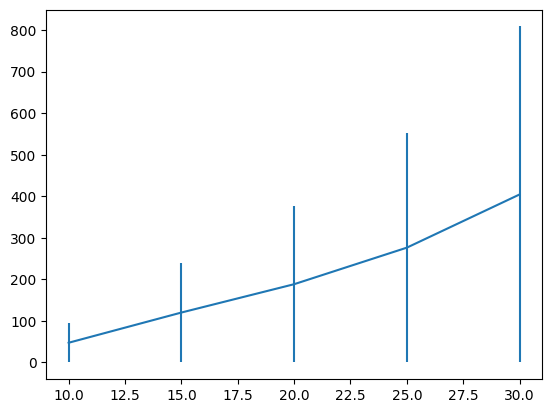

In [ ]:
# max attempts 10000
MAX_ATTEMPTS = 10000

# number of repetitions
REPEATS = 10

sizes = [10, 15, 20, 25, 30]
means = np.zeros(len(sizes))
std_deviations=np.zeros(len(sizes))

# ====> insert your code below here

# copy-paste the code from the cell above and wrap it in a loop 
# that stores the number of solutions tested in each run 
for i, num_vars in enumerate(sizes):
    attempts = np.zeros(REPEATS)

    for run in range(REPEATS):

        # define and create problem instance
        my_binary_onemax = OneMaxBinary(N=num_vars)
        # create search
        mysearch = LocalSearch( my_binary_onemax,
                            constructive = False,
                            max_attempts= MAX_ATTEMPTS,
                            minimise=False,
                            target_quality=num_vars)
        
        # run search for this run
        success = mysearch.run_search()
        # use max attempts if run did not find optimum
        attempts[run] = mysearch.trials if success else MAX_ATTEMPTS

    # after that loop report mean, and standard deviation of these
    # store results for this size of problem
    means[i]= np.mean(attempts)
    std_deviations[i]= np.mean(attempts)

# <==== insert your code above here

# for making the plots
from matplotlib import pyplot as plt
# plot results    
plt.errorbar(sizes, means, yerr=std_deviations)
plt.show()

<div style="background-color:black;width:100%;"></div>

# Part 2: Local Search for continuous One-max

<div class="alert alert-block alert-info" style="color:black"><h2> Activity 3: Adapting local search for a continuous problem</h2>
For continuous problems you will need to adapt your local search class. This requires adapting more of the methods from the single member search class.<br>
The below code changes the <code>__init__</code> method to initialise with appropriate continuous values, and stores the number of samples to take from the neighbourhood each iteration (<code>sample_size</code>), and whether to use gradient-based search or not (<code>use_gradient</code>).<br>

<b>Note:</b> this is a <em>Stretch</em> activity so don't worry if you can't complete it easily.

<br><b>How to get started:</b>
    <ol>
        <li>Adapt the <code>select_and_move_from_openlist(self)</code> method from your <code>LocalSearch</code> class so that it now accepts solutions that are as good as <code>self.best_so_far</code> and not just improvements.</li>
        <li>Over-ride the <code>run_search()</code> method so that it:
            <ul> 
                <li>Generates a number of neighbours defined by <code>sample_size</code></li>
                <li>For each neighbour, creates a set of changes (one for each variable) and adds those to the current values (then truncates to the valid range of values using <code>self.truncate_to_range</code>)
                <li>IF <code>self.use_gradients</code> is <code>False</code> it generates the list of changes at random. ELSE it calls <code>self.problem.get_gradient()</code> then multiplies the result by <code>self.learning_rate</code> to get the changes</li>
                <li>After looking at all of the neighbours, if they were all worse than what we had already, the open_list will be empty, so you  you need to put the <em>working_candidate</em> back on the open list instead of the closed list.</li>
            </ul>
    </ol> 
 </div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b>
    <ol>
        <li>The first step is very similar to the first activity. The key difference is we are now keeping candidate solutions that are equally as good as the current best.</li>
        <li>For the second step, copy and paste the <code>run_search()</code> method from the <code>SingleMemberSearch</code> class into the class below. You will need to make your changes in the bit that <b>generates</b> and <b>tests</b> new candidate solutions.</li>
        <li>Note: this version of the problem has a quality function that is the difference to the target so it needs to be minimised.</li>
</div>

In [9]:
   
class LocalSearchContinuous(SingleMemberSearch):
    """Implementation of local search for continuous problems.
      Assumes the search mode is perturbative.
      Extends single member search by doing explicit sampling of neighbourhood
      and if not stopping if no improvement is  found in an iteration

      Parameters
      ---------
      sample_size(int): 
          number of neighbours to generate each iteration
          default 10

      use_gradient(bool): 
          whether to use the gradient instead of random changes
          if the problem supports it.
          If set, assume sample_size is 1
          default False

      learning_rate(float)
          multiplier for gradient if used
          default 0.5
    """

    def __str__(self) -> str:
        return "local search continuous"
    
    def __init__(
        self,
        problem: Problem,
        constructive: bool = False,
        max_attempts: int = 50,
        minimise:bool=True,
        target_quality:float=1,
        sample_size:int = 10,
        use_gradient:bool=False,
        learning_rate=0.5):
        super().__init__(problem, constructive=constructive,
                       max_attempts=max_attempts,
                       minimise=minimise,
                       target_quality=target_quality)
        
        print(f'self.target_quality is {self.target_quality}')

        # reinitialise to random continuous values in right range
        self.num_vars  = len(self.open_list[0].variable_values)
        for decision in range(self.num_vars):
            self.open_list[0].variable_values[decision]= self.rand_in_range()

        # re-evaluate
        quality = self.problem.evaluate(self.open_list[0].variable_values)
        self.open_list[0].quality=quality    

        # store the number of neighbours to examine each iteration 
        self.sample_size = sample_size

        # does the problem support calculation of gradients
        self.use_gradient = use_gradient
        self.learning_rate = learning_rate
        if self.use_gradient:
            try:
                _ = self.problem.get_gradient()
                self.sample_size = 1
            except:
                self.use_gradient=False

    def rand_in_range(self)->float:
        """generates a random number in the range
        specified by the problem"""

        lowest_val = self.problem.value_set[0]
        val_range = self.problem.value_set[1] - self.problem.value_set[0]
        return np.random.random()*val_range +lowest_val
    
    def get_rand_normals_in_range(self)->list:
        """generates random number form  normal distribution
        mean= midpoint of valid range for problem
        sdev = 10% of valid range. for problem"""

        changes=[]
        valrange = self.problem.value_set[1]-self.problem.value_set[0]
        valmean =  (self.problem.value_set[1]+ self.problem.value_set[0])/2
        for pos in range(self.num_vars):
            randval= np.random.normal() *0.1*valrange + valmean
            changes.append(randval)
        return changes
        
    def truncate_to_range(self, val:float)->float:
        """ truncates a val ot the valid range
        defined by a problem"""

        if val>self.problem.value_set[1]:
            val = self.problem.value_set[1]
        if val < self.problem.value_set[0]:
            val = self.problem.value_set[0]
        return val
    
    def select_and_move_from_openlist(self) -> CandidateSolution:
        """Pops best thing from list, clears rest of list, then returns best thing
        relies on the presence of self.best_so_far

        Returns
        -------
        next working candidate (solution) taken from open list
           *if it is an improvement*
        None
           IF list is empty OR next thing is worse than best so far
        """

        next_soln = CandidateSolution()

       # check the open list isn't empty
        if len(self.open_list) == 0:
            self.runlog += "LS:empty open list\n"
            return None

        # get best child: start looking for it in position 0
        best_index = 0
        quality = self.open_list[0].quality
        best_so_far: int = quality

        # ====> insert your code below to copy the best solution from the open list into next_soln
        for idx in range(1,len(self.open_list)):
            quality = self.open_list[idx].quality
            if self.a_better_than_b(quality, best_so_far):
                best_index = idx
                best_so_far = quality
        next_soln = self.open_list.pop(best_index)
        # <==== insert your code above to copy the best solution from the open list into next_soln
        
        self.runlog += (
            f"\t best child quality {best_so_far},\n\t best so far {self.best_so_far}\n"
        )

        # clear the openlist
        # ====> insert your code below here to clear the openlist
        self.open_list.clear()
        # <==== insert your code above here to clear the openlist
        
        # always accept first move
        improvement_found: bool 
        if self.trials == 1:
            improvement_found = True
        # otherwise must be an improvement or at least as good (to keep search going)
        #i.e best_so_far must be at least as good as self.best_so_far
        elif self.a_better_than_b(best_so_far, self.best_so_far):
            # ====> insert your code below to set the value of variable improvement_found after first trial
            self.best_so_far = best_so_far
            improvement_found = True
            # <==== insert your code above to set the value of variable improvement_found after first trial

        # need this to keep going when stuck    
        if best_so_far == self.best_so_far:
            improvement_found = True

        # return best offspring from open list or None if it doesn't improve on self.best_so_far
        # ====> insert your code below to manage the return
        if improvement_found:
            return next_soln
        else:
            return None
        # <==== insert your code above manage the return

In [11]:
# define and create problem instance
num_vars = 10
continuous_onemax = OneMaxContinuous(N=num_vars)

# search using option 1 from the lectures - adding gaussian noise
my_search2 = LocalSearchContinuous(continuous_onemax,
                        constructive = False,
                        max_attempts= 500,
                        minimise=True,
                        target_quality=0.0)

success = my_search2.run_search()
if success:
    print(f'Local Search solved the problem '
          f'after {my_search2.trials} attempts.\n'
          f'solution {my_search2.result}\n'
          f'quality {my_search2.problem.evaluate(my_search2.result)}')
else:
    print(f'Failed to solve the problem in {my_search2.max_attempts} trials\n'
          f'runlog is:\n {my_search2.runlog}')

self.target_quality is 0.0
Local Search solved the problem after 149 attempts.
solution [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
quality 0.0


In [13]:
# search using option 2 from the lectures - using the gradient information
mysearch3 = LocalSearchContinuous(continuous_onemax,
                        constructive = False,
                        max_attempts= 500,
                        minimise=True,
                        target_quality=0.0,
                        use_gradient=True,
                        learning_rate=0.5)

success = mysearch3.run_search()
if success:
    print(f'Local Search solved the problem '
          f'after {mysearch3.trials} attempts.\n'
          f'solution {mysearch3.result}\n'
          f'quality {mysearch3.problem.evaluate(my_search2.result)}')
else:
    print(f'failed to solve the problem in {mysearch3.max_attempts} trials\n'
          f'runlog is:\n {mysearch3.runlog}')

self.target_quality is 0.0
Local Search solved the problem after 153 attempts.
solution [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
quality 0.0


<div class="alert alert-block alert-success" style="color:black"><b>Save and close Jupyter:</b>
    <ol>
        <li>Use the jupyterlab functions to download your work (ask your tutor if you need help with this) and save it somewhere sensible so you can find it easily.</li>
        <li>Shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook</li>
    </ol>
</div>